## Testing Articulos-v5

In [1]:
%load_ext autoreload
%autoreload 2
import json

with open("../../dumps/coronavirus-argentina-v5.json") as f:
    arts = json.load(f)
    
#with open("../../dumps/coronavirus-argentina-v4.json") as f:
#    old_arts = json.load(f)

In [1]:
len(arts), len(old_arts)

NameError: name 'arts' is not defined

In [4]:
print(f"Tenemos {len(arts)} artículos")

comments = sum(len(a["comments"]) for a in arts)

print(f"Tenemos {comments} comentarios")

Tenemos 116756 artículos
Tenemos 2133029 comentarios


In [5]:
arts[0].keys()

dict_keys(['_id', 'tweet_id', 'text', 'slug', 'title', 'url', 'user', 'body', 'created_at', 'comments'])

/home/jmperez/.local/share/virtualenvs/hatespeech-collection-qaK7Gomm/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
No handles with labels found to put in legend.


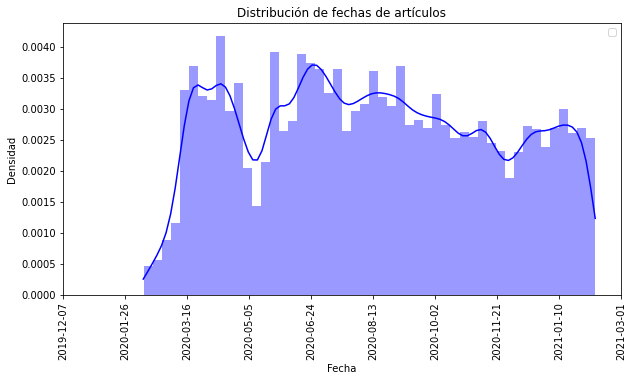

In [4]:
from hate_collector.plot import distplot_dates
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))

distplot_dates(
    [d["created_at"]["$date"] for d in arts], 
    color="blue", 
    kde_kws={"bw": 0.08},
)
#distplot_dates([d["created_at"]["$date"] for d in old_arts], color="red", label="4.0")
plt.legend()

plt.title("Distribución de fechas de artículos")
plt.xlabel("Fecha")
plt.ylabel("Densidad")
plt.savefig("distribucion_fechas_dataset.png");



Fecha mínima: 10 de Febrero de 2020

Fecha máxima: 8 de Febrero de 2021

Casi 4 meses más de datos


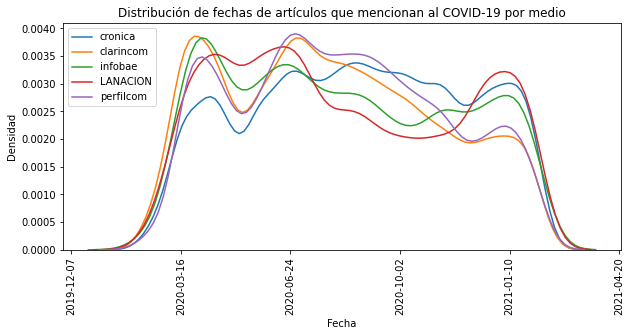

In [5]:
from collections import defaultdict
import datetime

dates_by_newspaper = defaultdict(list)

whitelist = ["cronica", "clarincom", "infobae", "LANACION", "perfilcom"]

for art in arts:
    date = datetime.datetime.strptime(art["created_at"]["$date"], "%Y-%m-%dT%H:%M:%SZ")
    dates_by_newspaper[art["user"]].append(date)
    

plt.figure(figsize=(10, 5))

for newspaper, dates in dates_by_newspaper.items():
    distplot_dates(dates, label=newspaper, hist=False)

    
plt.legend()

plt.gcf().subplots_adjust(bottom=0.25)
plt.title("Distribución de fechas de artículos que mencionan al COVID-19 por medio");

plt.legend(labels=whitelist)
plt.ylabel("Densidad")
plt.xlabel("Fecha")
plt.savefig("fechas_por_medios.png", bbox_inches='tight')


In [18]:
dates = [datetime.datetime.strptime(art["created_at"]["$date"], "%Y-%m-%dT%H:%M:%SZ") for art in arts]


min(dates), max(dates)

(datetime.datetime(2020, 2, 10, 0, 0, 39),
 datetime.datetime(2021, 2, 8, 8, 1, 43))

In [12]:
dates = [datetime.datetime.strptime(art["created_at"]["$date"], "%Y-%m-%dT%H:%M:%SZ") for art in old_arts]


min(dates), max(dates)

(datetime.datetime(2020, 2, 10, 0, 0, 39),
 datetime.datetime(2020, 10, 21, 22, 44, 37))

In [16]:
from tqdm.auto import tqdm
from collections import Counter

counter = Counter(art["user"] for art in arts)
#old_counter = Counter(art["user"] for art in old_arts)
comments_counter = Counter()
for art in arts:
    comments_counter[art["user"]] += len(art["comments"])
keys = sorted(counter.keys())

total_arts = len(arts)
total_comments = sum(comments_counter.values())
for k in counter:
    #ratio = counter[k] / old_counter[k]
    #diff = counter[k] - old_counter[k]
    #print(f"{k:<10} -- {counter[k]:<5} -- Antes: {old_counter[k]:<5} (+{diff:<5}) -- {ratio * 100:.2f}")
    print(f"{k:<10} -- {counter[k]:<5} -- {comments_counter[k]}   comentarios")
    
print(f"Total -- {total_arts} -- {total_comments}")

infobae    -- 45652 -- 822462   comentarios
clarincom  -- 29050 -- 672401   comentarios
perfilcom  -- 8764  -- 61203   comentarios
LANACION   -- 16040 -- 506091   comentarios
cronica    -- 17250 -- 70872   comentarios
Total -- 116756 -- 2133029
